In [25]:
import tensorflow as tf 
from keras.datasets import mnist

In [153]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [29]:
import matplotlib.pyplot as plt

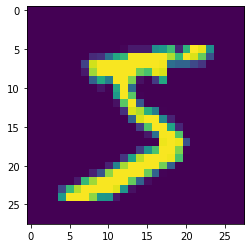

In [31]:
plt.imshow(x_train[0])

In [36]:
numbers = list(range(10))

In [53]:
list_plot = []

for i in numbers:
  index = 0 
  len_list = len(list_plot)
  while len(list_plot) != 5 + len_list:
    if (y_train[index] == i):
      list_plot.append(index)
    index += 1

assert len(list_plot) == 5*10

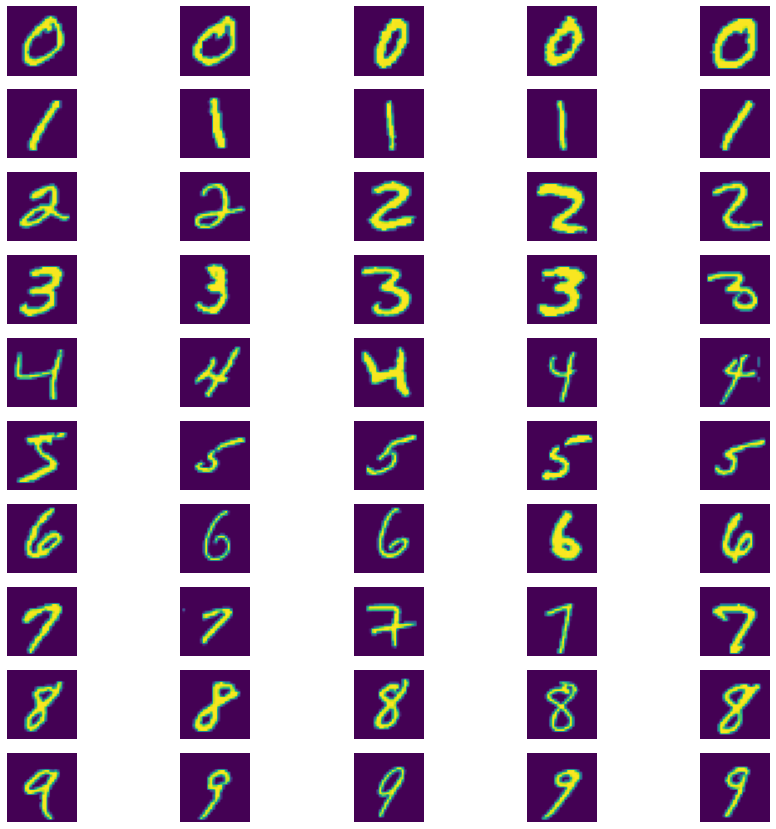

In [59]:
fig, axs = plt.subplots(nrows=10, ncols=5, figsize=(15, 15))

# Iterate over the subplots and plot the images
for i, ax in enumerate(axs.flatten()):
    ax.imshow(x_train[list_plot[i]])
    ax.axis('off')

plt.show()

In [69]:
import numpy as np

In [71]:
max_val,min_val = np.max(x_train),np.min(x_train)
print("Maximum value:", max_val, " Minimum value: ",min_val)

Maximum value: 255  Minimum value:  0


grayscale images

In [154]:
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')

normalize

In [155]:
x_train /= 255
x_test /= 255

In [156]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [90]:
from keras import layers 
from keras import models

In [105]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3),activation="relu"  ,input_shape=(28,28,1)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, (3,3),activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(10,activation='softmax'))

In [106]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"])

In [160]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [110]:
history = model.fit(x_train,y_train,batch_size=123,epochs=10,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47970/48000 [============================>.] - ETA: 0s - loss: 0.2078 - accuracy: 0.9364

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


48000/48000 [==============================] - 51s 1ms/sample - loss: 0.2077 - accuracy: 0.9365 - val_loss: 0.0792 - val_accuracy: 0.9762
Epoch 2/10
48000/48000 [==============================] - 50s 1ms/sample - loss: 0.0614 - accuracy: 0.9817 - val_loss: 0.0553 - val_accuracy: 0.9847
Epoch 3/10
48000/48000 [==============================] - 50s 1ms/sample - loss: 0.0419 - accuracy: 0.9875 - val_loss: 0.0508 - val_accuracy: 0.9859
Epoch 4/10
48000/48000 [==============================] - 50s 1ms/sample - loss: 0.0337 - accuracy: 0.9895 - val_loss: 0.0502 - val_accuracy: 0.9843
Epoch 5/10
48000/48000 [==============================] - 50s 1ms/sample - loss: 0.0267 - accuracy: 0.9920 - val_loss: 0.0408 - val_accuracy: 0.9883
Epoch 6/10
48000/48000 [==============================] - 52s 1ms/sample - loss: 0.0222 - accuracy: 0.9933 - val_loss: 0.0437 - val_accuracy: 0.9881
Epoch 7/10
48000/48000 [==============================] - 49s 1ms/sample - loss: 0.0181 - accuracy: 0.9948 - val_loss

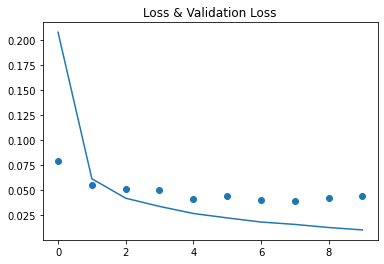

In [113]:
n = range(10)

loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(n,loss)
plt.scatter(n,val_loss)
plt.title("Loss & Validation Loss")
plt.show()

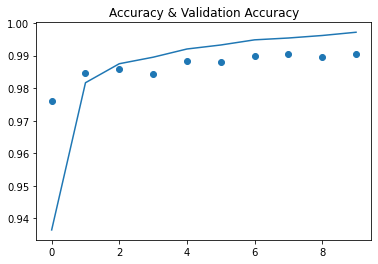

In [115]:
history.history
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(n,acc)
plt.scatter(n,val_acc)
plt.title("Accuracy & Validation Accuracy")
plt.show()

In [161]:
test_loss, test_acc = model.evaluate(x_test, y_test)

In [162]:
test_loss,test_acc

(0.03098669105570807, 0.9921)